In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
titanic=pd.read_csv('/content/train.csv')

In [ ]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

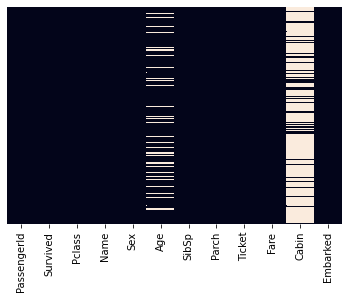

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

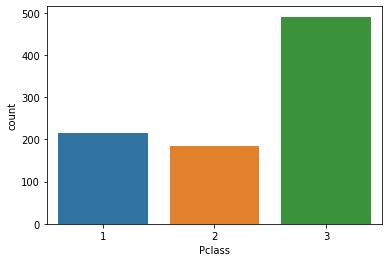

In [ ]:
#Data visualisation
sns.countplot(x='Pclass',data=titanic)

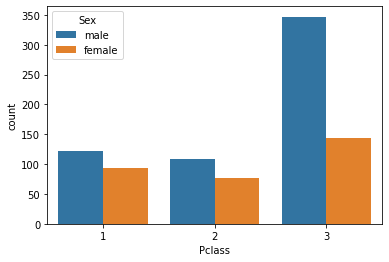

In [ ]:
sns.countplot(x='Pclass',hue='Sex',data=titanic)

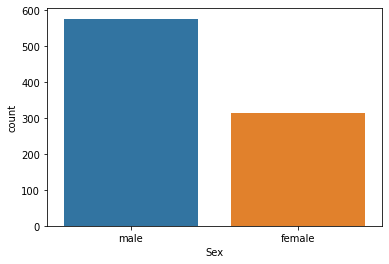

In [ ]:
sns.countplot(x='Sex',data=titanic)

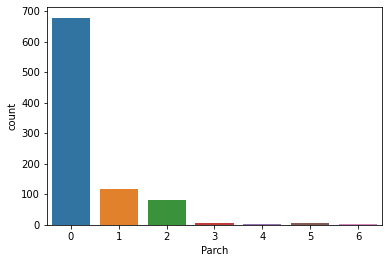

In [ ]:
sns.countplot(x='Parch',data=titanic)

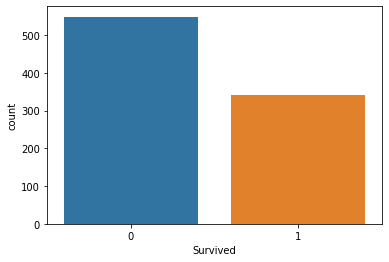

In [ ]:
sns.countplot(x='Survived',data=titanic)

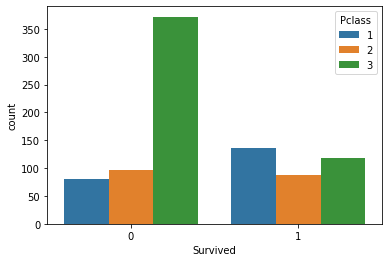

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

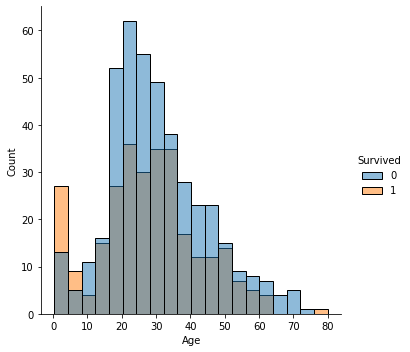

In [ ]:
sns.displot(x='Age',hue='Survived',data=titanic)

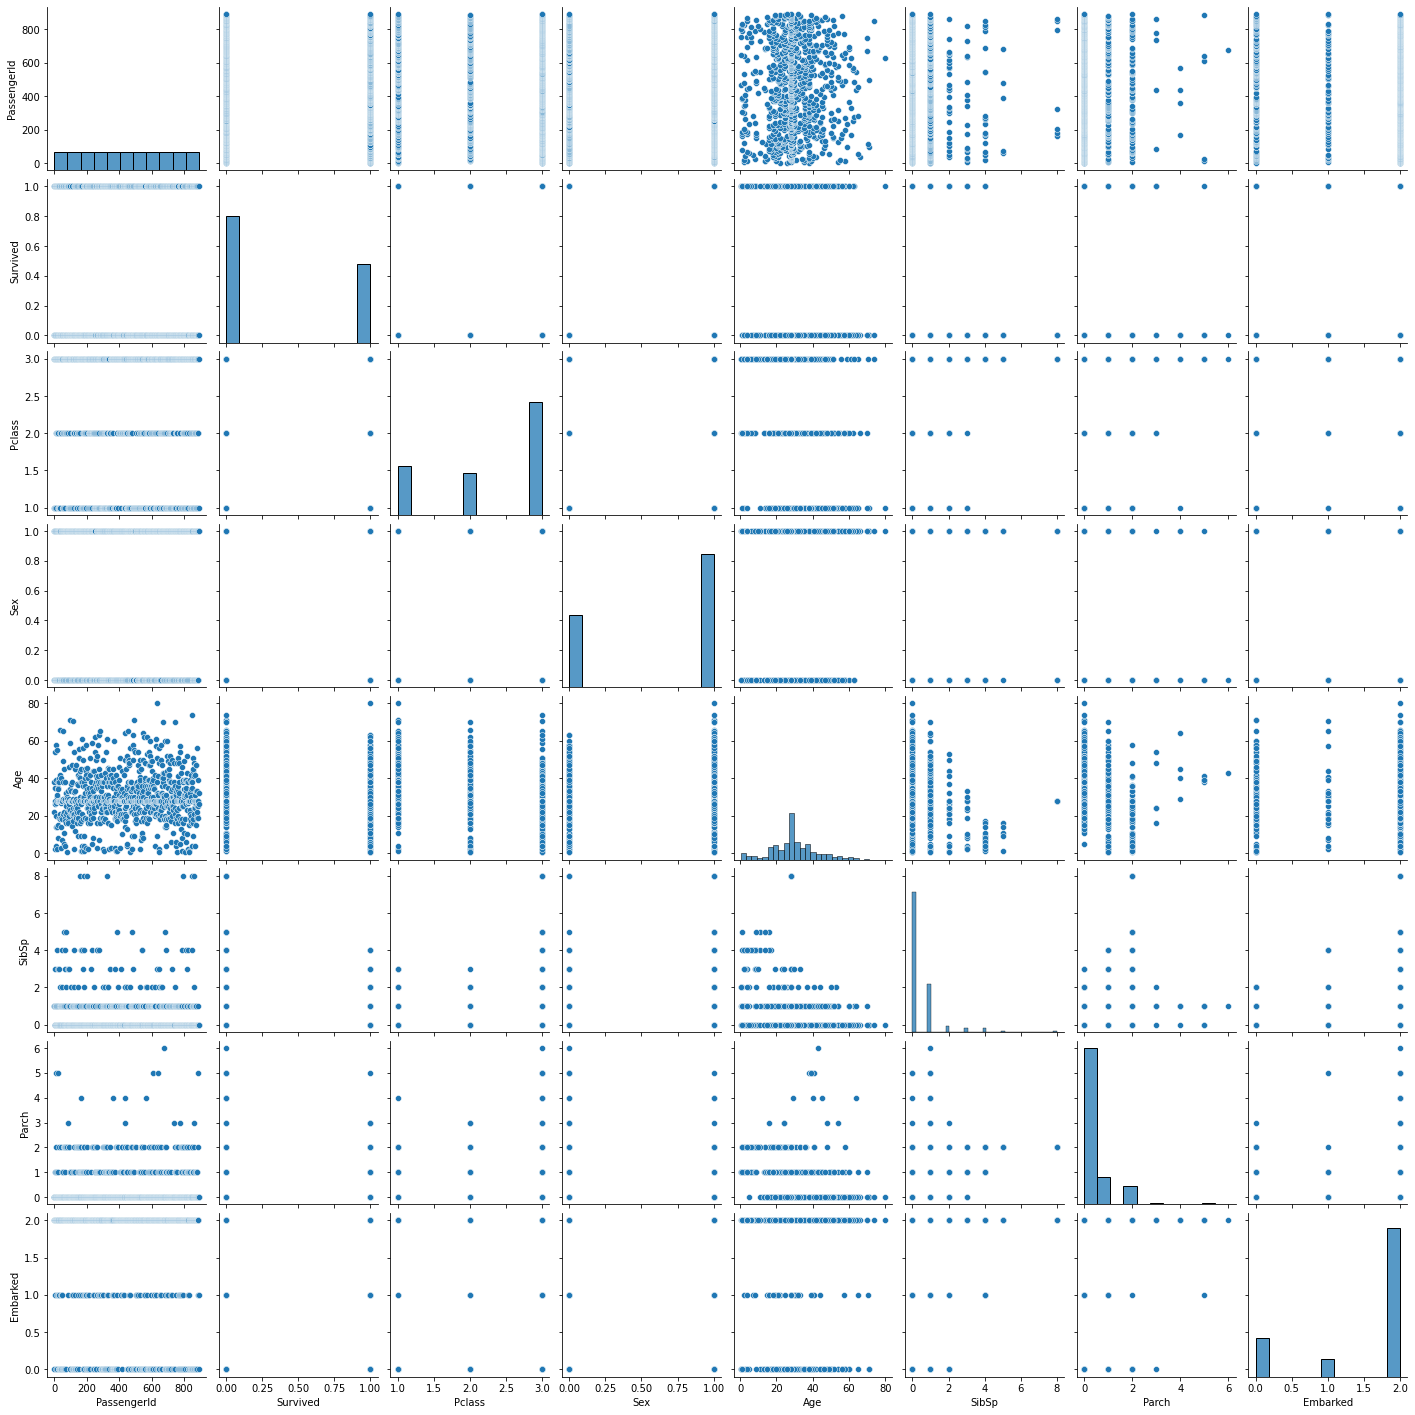

In [ ]:
sns.pairplot(titanic)

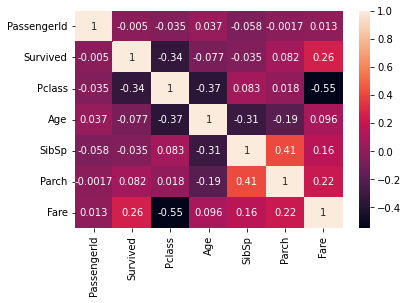

In [ ]:
sns.heatmap(titanic.corr(),annot=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


remove name
convert sex in int form 0 and 1
remove of null values
remove ticket and fare
cabin have many null values
convert it into 0,1,2 object to int

In [ ]:
titanic.drop(['Name','Ticket','Fare',],axis=1,inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


1.Dummies
2.Label encoder

In [ ]:
gender=pd.get_dummies(titanic['Sex'])

In [ ]:
gender.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)

In [ ]:
gender.head(3)

,male
0,1
1,0
2,0


Age Replacing
1.Mean
2.Median
3.MOde

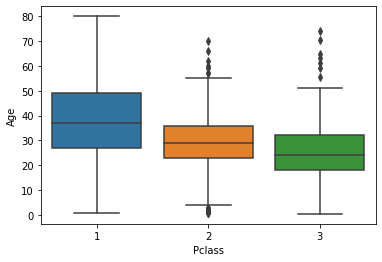

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [ ]:
def age(cols):
   Age=cols[0]
   Pclass=cols[1]
   if pd.isnull(Age):
     if Pclass==1:
       return 38
     elif Pclass==2:
            return 30
     elif Pclass==3:
            return 28
   else:
        return Age

In [ ]:
titanic['Age']=titanic[['Age','Pclass']].apply(age,axis=1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic.dropna(inplace=True)

In [ ]:
titanic['Embarked'].isnull().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
encoder.fit_transform(titanic['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [ ]:
titanic['Embarked']=encoder.fit_transform(titanic['Embarked'])

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,2
1,2,1,1,female,38.0,1,0,0
2,3,1,3,female,26.0,0,0,2
3,4,1,1,female,35.0,1,0,2
4,5,0,3,male,35.0,0,0,2


In [ ]:
titanic['Sex']=gender

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
predic1=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,predic1))

0.8197278911564626
